In [16]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm, ListedColormap
import plotly.graph_objects as go
import plotly.io as pio

In [17]:
# Defining parameters
R = 2         # [mm/day]
r_m=0.3     # [1/year]
h_R=0.5     # [mm/day]
m_n=0.15    # [1/year]
h_n=0.1
m_f=0.11    # [1/year]
h_f=0.6
p=7
k=0.9
b=2         # [mm/day]
r_R=1       # [1/year]
EPS=1e-15

# Question 1

In [18]:
r = lambda R: r_m * R / (h_R + R)
def dTdt(t, T, R):
    return r(R) * T * (1 - T/k) - m_n * T * h_n / (T + h_n)  - m_f * T * (h_f**p) / (T**p + h_f**p)

def is_equil(R,T):
    return abs(dTdt(0, T, R))<=1e-3

R_arr = np.linspace(0, 5, 100)  # [mm/day]
T0 = np.array([0.05, 0.25, 0.50, 0.75, 1])
t_span = (0, 600)
t_eval = np.linspace(t_span[0], t_span[1], 600)

T_arr = np.zeros((len(t_eval), len(T0), len(R_arr)))

for i, R in enumerate(R_arr):
    sol = solve_ivp(fun=lambda t, y: dTdt(t, y, R), y0=T0, t_span=t_span, t_eval=t_eval, method='RK45')
    T_arr[:, :, i] = sol.y.T

In [19]:
for i in range(len(T0)):

    T_init = T0[i]
    T_results = T_arr[:, i, :]

    plt.figure(figsize=(12, 10))
    
    # Plot the heatmap using imshow with the custom colormap
    extent = [t_span[0], t_span[1], R_arr.min(), R_arr.max()]
    im = plt.imshow(T_results.T, extent=extent, origin='lower', aspect='auto', cmap="plasma")
    
    # Add contour lines if desired
    levels = np.linspace(0, 1, num=100)  # Adjust number of levels
    
    # Add colorbar for reference
    plt.colorbar(im)
    
    # Label the axes and the plot
    plt.xlabel('Time [year]')
    plt.ylabel('R [mm/day]')
    plt.title(f'Evolution of T with time and R, T0 = {T_init}')
    
    # Show the plot
    plt.show()





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

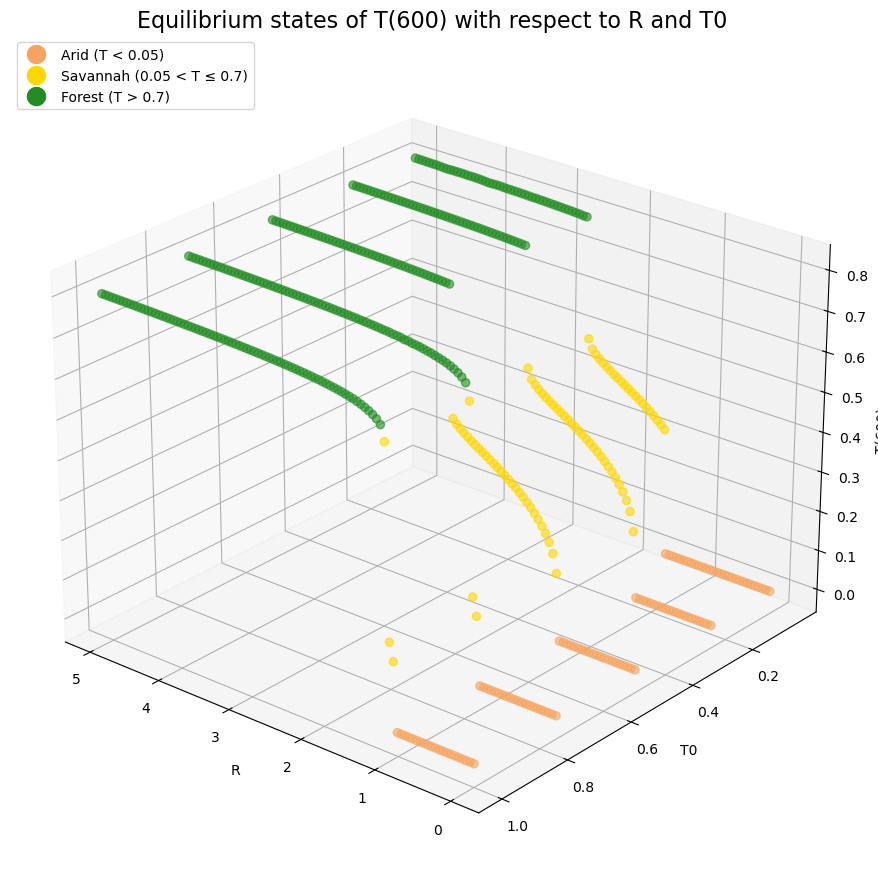

In [5]:
from matplotlib.lines import Line2D


# Assume T_arr, R_arr, and T0 are predefined arrays
T600 = T_arr[-1, :, :].flatten()
R_mesh, T0_mesh = np.meshgrid(R_arr, T0)

# Define the color for each point based on the T600 value
colors = np.where(T600 < 0.05, 'sandybrown', np.where(T600 <= 0.7, 'gold', 'forestgreen'))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 9))  # Set figure size
ax = fig.add_subplot(111, projection='3d', adjustable='box')

# Increase marker size and make them semi-transparent for better visibility
sc = ax.scatter(R_mesh.flatten(), T0_mesh.flatten(), T600.flatten(), c=colors, s=35, alpha=0.6)

# Custom legend with more descriptive labels and larger icons
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Arid (T < 0.05)', markersize=15, markerfacecolor='sandybrown', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', label='Savannah (0.05 < T ≤ 0.7)', markersize=15, markerfacecolor='gold', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', label='Forest (T > 0.7)', markersize=15, markerfacecolor='forestgreen', linestyle='None'),
]
ax.legend(handles=legend_elements, loc='upper left')

# Grid lines and 3D effect
ax.grid(True)  # Show grid lines for better orientation
ax.set_xlabel('R')
ax.set_ylabel('T0')
ax.set_zlabel('T(600)')
ax.set_title("Equilibrium states of T(600) with respect to R and T0", fontsize=16)

# Adjust the aspect ratio
# ax.set_box_aspect([np.ptp(i) for i in [R_mesh.flatten(), T0_mesh.flatten(), T600.flatten()]])

# Set view angle for better 3D effect
ax.view_init(elev=25, azim=130)  # Elevation and azimuth for good 3D view

plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()


# Question 2

In [ ]:
R_const = 2

r = lambda x: r_m * x / (h_R + x)

def dTdt(t, y1, y2):
    return r(y2) * y1 * (1 - y1/k) - m_n * y1 * h_n / (y1 + h_n)  - m_f * y1 * (h_f**p) / (y1**p + h_f**p)

def dRdt(t, y1, y2):
    return r_R * ((R_const + b * y1 / k) - y2)

def dzdt(t, y):
    return [dTdt(t, *y), dRdt(t, *y)]

R0 = np.linspace(0, 5, 100)  # [mm/day]
T0 = np.linspace(0, 1, 10)

t_span = (0, 600)
t_eval = np.linspace(t_span[0], t_span[1], 600)

T_arr = np.zeros((len(t_eval), len(T0), len(R0)))
R_arr = np.zeros((len(t_eval), len(T0), len(R0)))


for i, r0 in enumerate(R0):
    for j, t0 in enumerate(T0):
        sol = solve_ivp(fun=lambda t, y: dzdt(t, y), y0=[t0, r0] , t_span=t_span, t_eval=t_eval, method='RK45')
        T_arr[:, j, i] = sol.y[0]
        R_arr[:, j, i] = sol.y[1]   
    

In [ ]:
# Define your functions and create the T_arr and R_arr arrays as in your code

# Create a meshgrid of R and T0 values
R_mesh, T0_mesh = np.meshgrid(R0, T0)
T600 = T_arr[-1,:,:]

# Define the custom color scale directly in the figure definition
custom_scale = [
    (0, 'red'),       # red for T from 0 to 0.05
    (0.05, 'red'),    # sharp boundary
    (0.05, 'green'),  # green for T from 0.05 to 0.7
    (0.7, 'green'),   # sharp boundary
    (0.7, 'orange'),  # orange for T from 0.7 to 1
    (1.0, 'orange')   # sharp boundary
]

# Define the figure with 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=R_mesh.flatten(),
    y=T0_mesh.flatten(),
    z=T600.flatten(),
    mode='markers',
    marker=dict(
        size=8,
        color=T600.flatten(),  # set color equal to a variable
        colorscale=custom_scale,  # this should be defined as before
        # Remove the colorbar settings, we're using a legend now
    ), 
    showlegend = False
))

# Add dummy traces for legend entries
for val, color, label in zip([0.025, 0.375, 0.85], ['red', 'green', 'orange'], ['arid', 'savanah', 'forest']):
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=label
    ))

# Update layout to add legend and adjust scene labels
fig.update_layout(
    title="3D Scatter Plot with Custom Legend",
    scene=dict(
        xaxis_title='R',
        yaxis_title='T0',
        zaxis_title='T(600)'
    ),
    legend_title_text='Forest states',  # Optional: add a title to the legend
    showlegend=True
)
fig.update_layout(
    width=600,  # Width of the plot in pixels
    height=600,  # Height of the plot in pixels, set equal to width for a square plot
    margin=dict(l=50, r=50, b=50, t=50)  # Optional: Adjust the margin to make sure the plot is not clipped
)

# Show plot
fig.show()

In [ ]:
y1=np.linspace(0,1,11)
# dT/dt évalué en R* tq dR/dt(R*)=0 (R*calculé à la main)
fct=r_m*(k*R_const+b*y1) * y1 * (1 - y1/k)/(k*h_R+k*R_const+b*y1) - m_n * y1 * h_n / (y1 + h_n)  - m_f * y1 * (h_f**p) / (y1**p + h_f**p)
plt.plot(y1,fct)
plt.plot(y1,np.zeros(len(y1)),linestyle="--")
plt.plot(0.8*np.ones(2),[0.01,-0.045],linestyle="--")